In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2FwdXJ2YW5ha2FkZS9HaXRodWIvMjAyNVN1LU1vbnRlLUNhcmxvLU1ldGhvZHMvY2hhcHRlcnMvYXBwbGljYXRpb25z'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/var/folders/2y/zsgtjj415jdb0d4y2b_wx7th0000gn/T/ipykernel_462/2838295678.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/apurvanakade/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1708117302.8894389, "/Users/apurvanakade/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1708117302.895673, "/Users/apurvanakade/miniconda3/lib/python3.12/zipimport.py": 1708117300.842618, "/Users/apurvanakade/miniconda3/lib/python3.12/codecs.py": 1708117300.2231953, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/aliases.py": 1708117301.4904184, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/__init__.py": 1708117301.4862745, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/utf_8.py": 1708117302.0979323, "/Users/apurvanakade/miniconda3/lib/python3.12/abc.py": 1708117300.1248448, "/Users/apurvanakade/miniconda3/lib/python3.12/io.py": 1708117300.4300423, "/Users/apurvanakade/miniconda3/lib/python3.12/stat.py": 1708117300.6806324, "/Users/apurvanakade/miniconda3/lib/python3.12/_collections_abc.py": 1708117300.0486746, "/Users/apurvanakade/miniconda3/lib/python3.12/genericpath.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

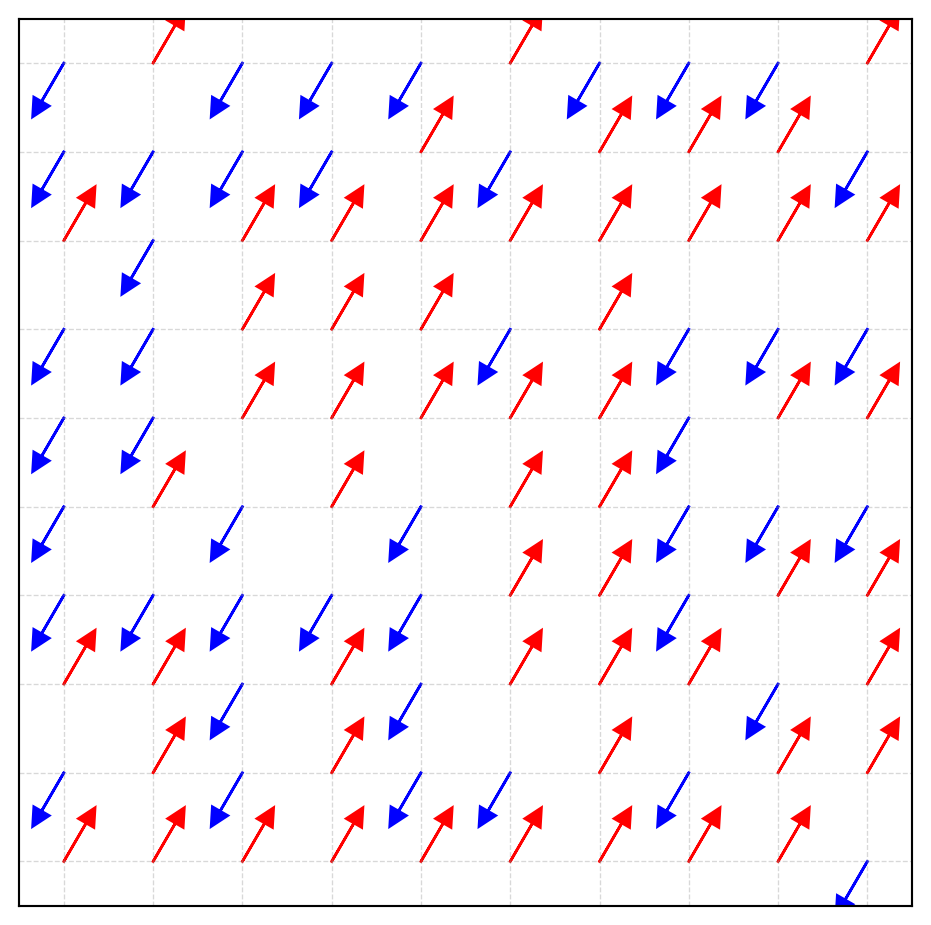

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_ising_model(spin_grid):
    """
    Plots a 2D Ising model with up (red) and down (blue) arrows, tilted to prevent overlap.
    :param spin_grid: 2D numpy array of spins (+1 or -1)
    """
    Lx, Ly = spin_grid.shape
    x, y = np.meshgrid(range(Lx), range(Ly), indexing='ij')
    
    plt.figure(figsize=(6,6))
    
    for i in range(Lx):
        for j in range(Ly):
            color = 'red' if spin_grid[i, j] == 1 else 'blue'
            angle = 30 if spin_grid[i, j] == 1 else -150  # Tilt angle to prevent overlap
            dx = 0.5 * np.sin(np.radians(angle))
            dy = 0.5 * np.cos(np.radians(angle))
            plt.arrow(j, -i, dx, dy,
                      head_width=0.2, head_length=0.2, fc=color, ec=color)
    
    # Draw faint grid lines manually
    for i in range(Lx + 1):
        plt.hlines(-i, -0.5, Ly - 0.5, colors='gray', linestyles='--', linewidth=0.5, alpha=0.3)
    for j in range(Ly + 1):
        plt.vlines(j, -Lx + 0.5, 0.5, colors='gray', linestyles='--', linewidth=0.5, alpha=0.3)
    
    plt.xlim(-0.5, Ly - 0.5)
    plt.ylim(-Lx + 0.5, 0.5)
    plt.xticks([])
    plt.yticks([])
    plt.show()

# Example: Generate a random Ising model grid
np.random.seed(42)
L = 10  # Grid size
ising_grid = np.random.choice([-1, 1], size=(L, L))
plot_ising_model(ising_grid)

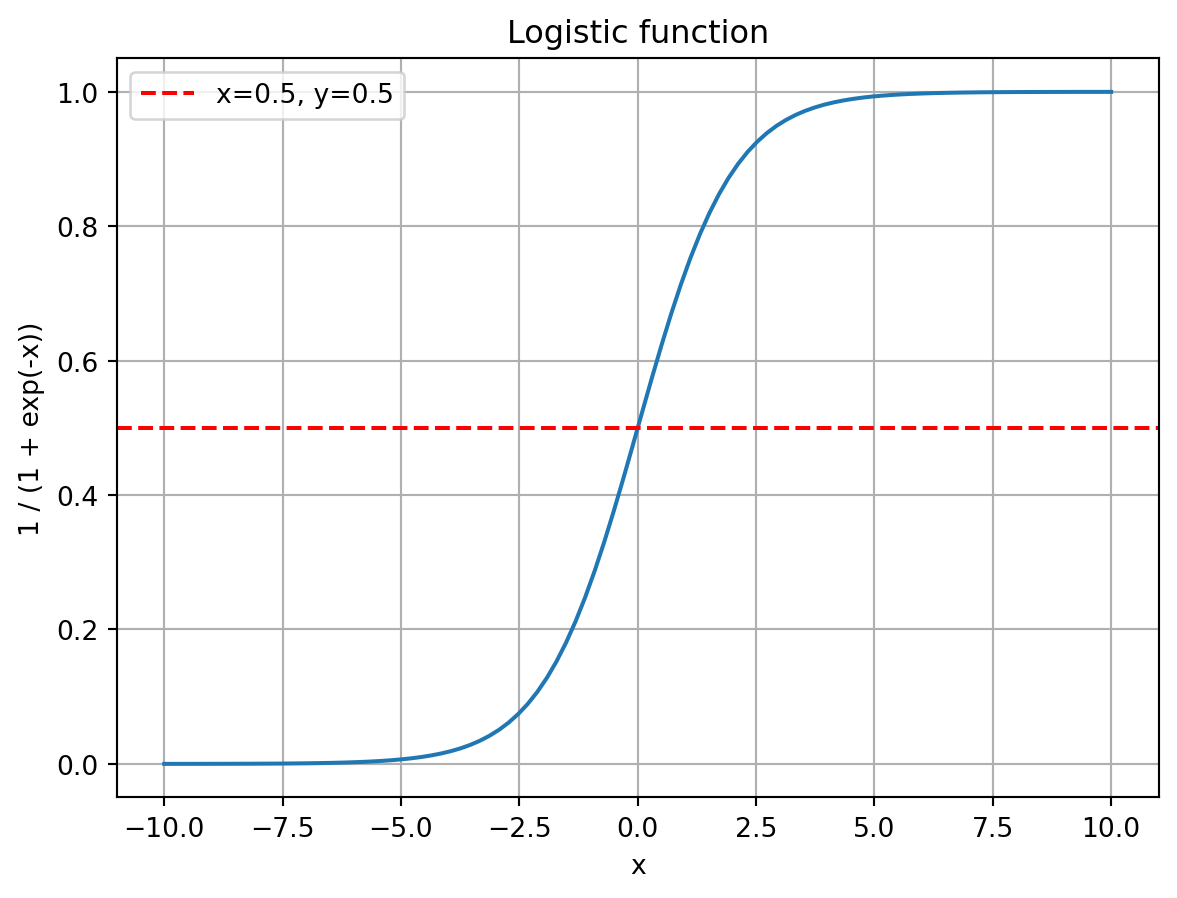

In [4]:
# draw graph of logistic function 

x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y)
plt.axhline(0.5, color='red', linestyle='--', label='x=0.5, y=0.5')
plt.xlabel('x')
plt.ylabel('1 / (1 + exp(-x))')
plt.title('Logistic function')
plt.legend()
plt.grid()
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_lattice(L):
    """Initialize an LxL lattice with random spins (+1 or -1)."""
    return np.random.choice([-1, 1], size=(L, L))

def magnetization(lattice):
    """Compute the magnetization of the lattice."""
    return np.sum(lattice) / lattice.size

def gibbs_step(lattice, beta, J=1):
    """Perform a single Gibbs sampling step."""
    L = lattice.shape[0]
    for i in range(L):
        for j in range(L):
            neighbors = lattice[(i+1)%L, j] + lattice[(i-1)%L, j] + \
                        lattice[i, (j+1)%L] + lattice[i, (j-1)%L]
            h = J * neighbors
            P_up = 1 / (1 + np.exp(-2 * beta * h))
            lattice[i, j] = 1 if np.random.rand() < P_up else -1

def simulate_ising_gibbs(L, T_start, T_end, steps, snapshots=16):
    """Simulate the Ising model using Gibbs sampling with temperature annealing."""
    lattice = initialize_lattice(L)
    magnetizations = {}
    saved_lattices = []
    snapshot_interval = steps // snapshots  # Save states evenly over time
    
    # add some equilibrium time
    for _ in range(steps // 10):
        gibbs_step(lattice, 1 / T_start)
    
    for step in range(steps):
        T = T_start + (T_end - T_start) * (step / steps)  # Linearly varying temperature
        beta = 1 / T
        gibbs_step(lattice, beta)
        
        # if step % (steps // 100) == 0:
        magnetizations[T] = magnetization(lattice)
        if step % snapshot_interval == 0 and len(saved_lattices) < snapshots:
            saved_lattices.append(np.copy(lattice))
    
    return lattice, magnetizations, saved_lattices

# Parameters
L = 20  # Lattice size
T_start = 1.4  # Initial temperature (highly disordered state)
T_end = 3.0  # Final temperature (more ordered state)
steps = 10000  # Number of Gibbs steps
snapshots = 8  # Number of snapshots to capture

# Critical Temperature for 2D Ising Model
Tc = 2 / np.log(1 + np.sqrt(2))  # ~2.269

# Run simulation with cooling schedule
final_lattice, magnetizations, saved_lattices = simulate_ising_gibbs(L, T_start, T_end, steps, snapshots)

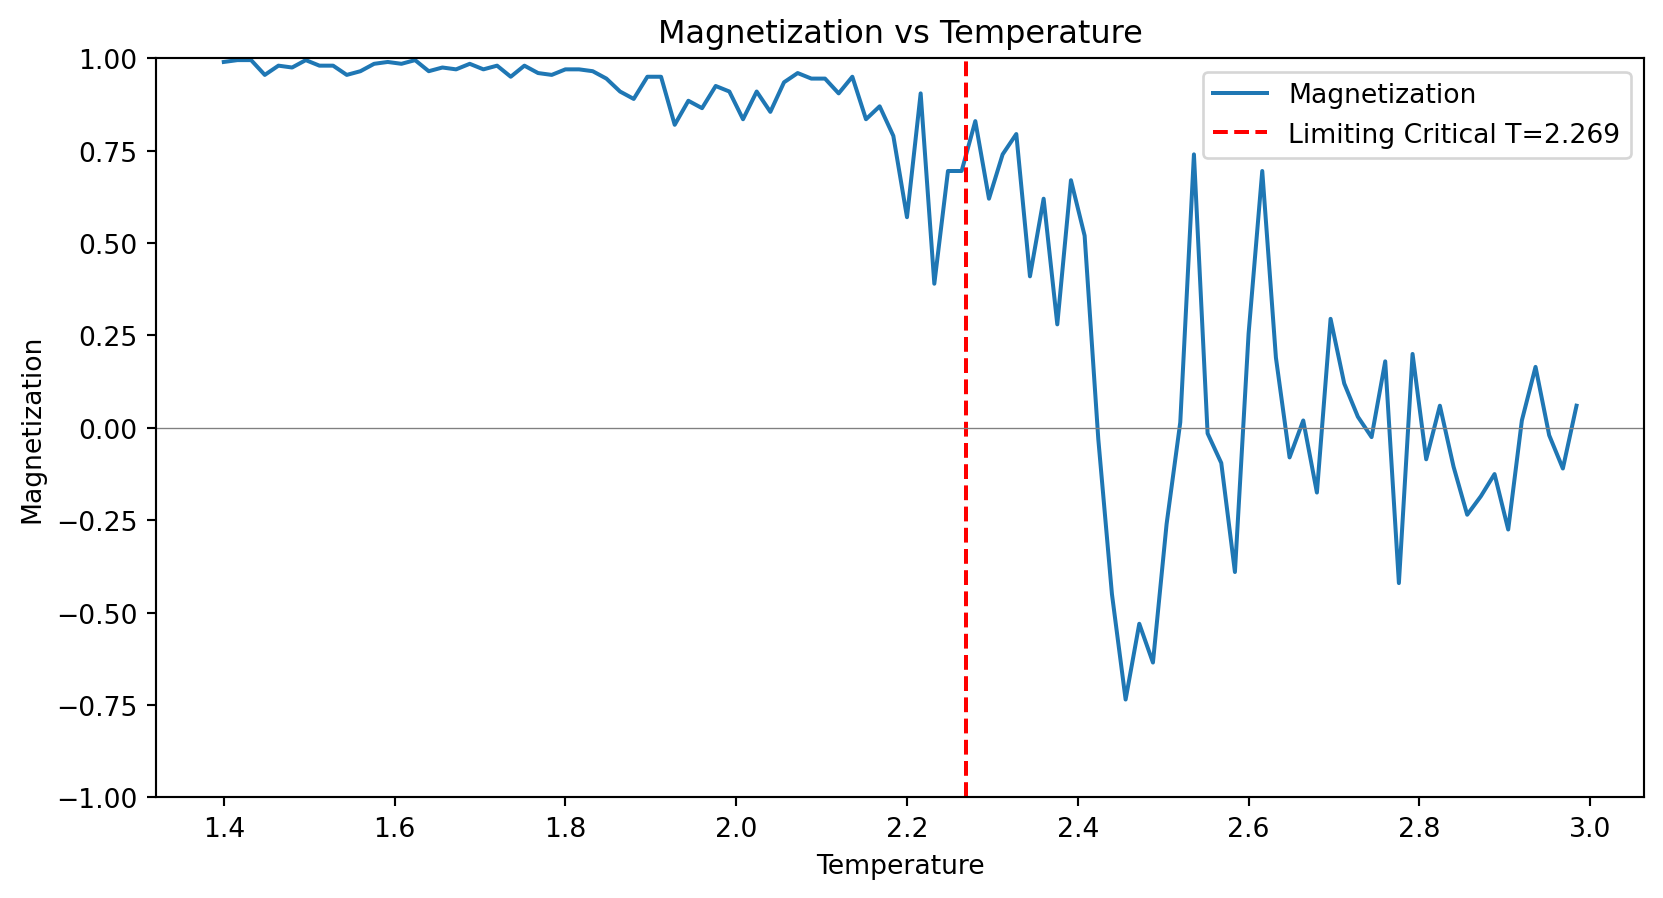

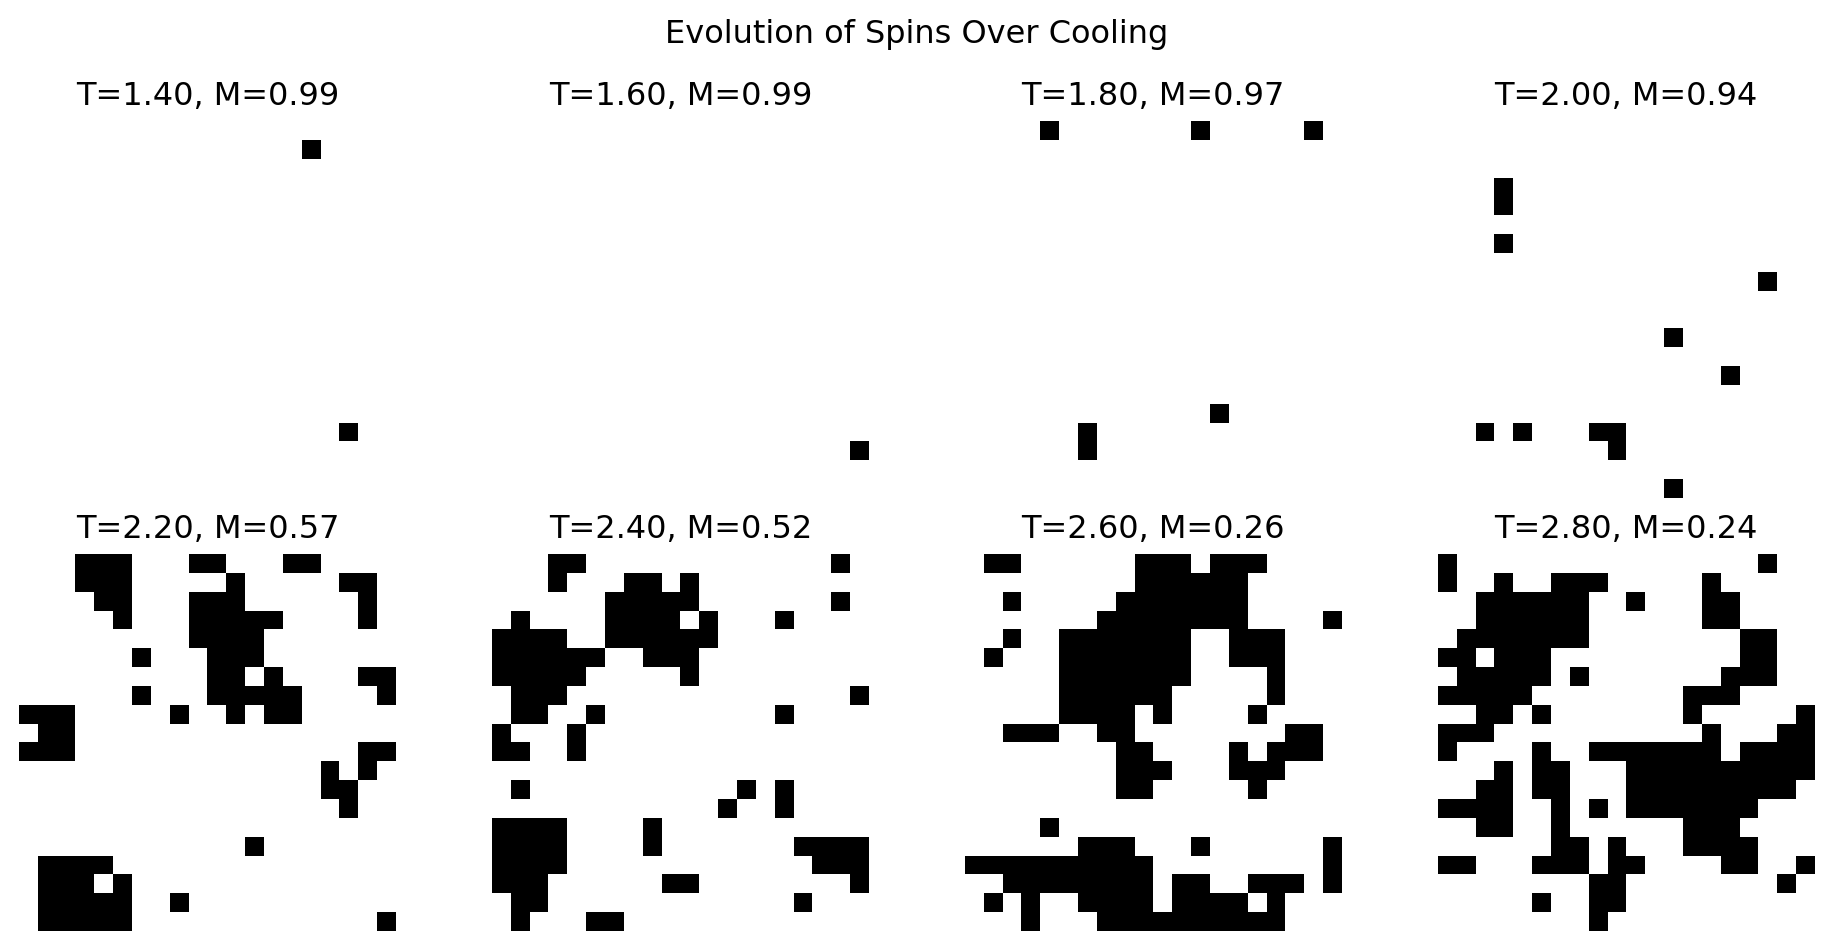

In [6]:
# Convert magnetizations dictionary to a list of values sorted by temperature
plt.figure(figsize=(10, 5))
sorted_temperatures = sorted(magnetizations.keys())
sorted_magnetizations = [magnetizations[T] for T in sorted_temperatures]
plt.plot(sorted_temperatures[::100], sorted_magnetizations[::100], label='Magnetization')
plt.axvline(x=Tc, color='r', linestyle='--', label=f'Limiting Critical T={Tc:.3f}')
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=0.5)
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.title('Magnetization vs Temperature')
plt.legend()
plt.show()

# Visualization of Spin Evolution
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    T_current = T_start + (T_end - T_start) * (i / snapshots)
    T_rounded = round(T_current, 4)  # Round to match the keys in the dictionary
    
    # find closest temperature in the dictionary
    closest_T = min(magnetizations.keys(), key=lambda x: abs(x - T_current))
    ax.imshow(saved_lattices[i], cmap='gray')
    ax.set_title(f'T={T_current:.2f}, ' + f'M={magnetizations[closest_T]:.2f}')
    ax.axis('off')
plt.suptitle('Evolution of Spins Over Cooling')
plt.tight_layout()
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_lattice(L):
    """Initialize an LxL lattice with random spins (+1 or -1)."""
    return np.random.choice([-1, 1], size=(L, L))

def magnetization(lattice):
    """Compute the magnetization of the lattice."""
    return np.sum(lattice) / lattice.size

def gibbs_step(lattice, beta, J=1):
    """Perform a single Gibbs sampling step."""
    L = lattice.shape[0]
    for i in range(L):
        for j in range(L):
            neighbors = lattice[(i+1)%L, j] + lattice[(i-1)%L, j] + \
                        lattice[i, (j+1)%L] + lattice[i, (j-1)%L]
            h = J * neighbors
            P_up = 1 / (1 + np.exp(-2 * beta * h))
            lattice[i, j] = 1 if np.random.rand() < P_up else -1

def simulate_ising_gibbs(L, T, steps):
    """Simulate the Ising model using Gibbs sampling with magnetization tracking."""
    beta = 1 / T
    lattice = initialize_lattice(L)
    magnetizations = []
    
    for _ in range(steps):
        gibbs_step(lattice, beta)
        if _ % (steps // 100) == 0:  # Sample magnetization every 1% of the steps
            magnetizations.append(magnetization(lattice))
    
    return lattice, magnetizations

# Parameters
L = 20  # Lattice size
T = 2.0  # Temperature
steps = 5000  # Number of Gibbs steps

# Run simulation
final_lattice, magnetizations = simulate_ising_gibbs(L, T, steps)

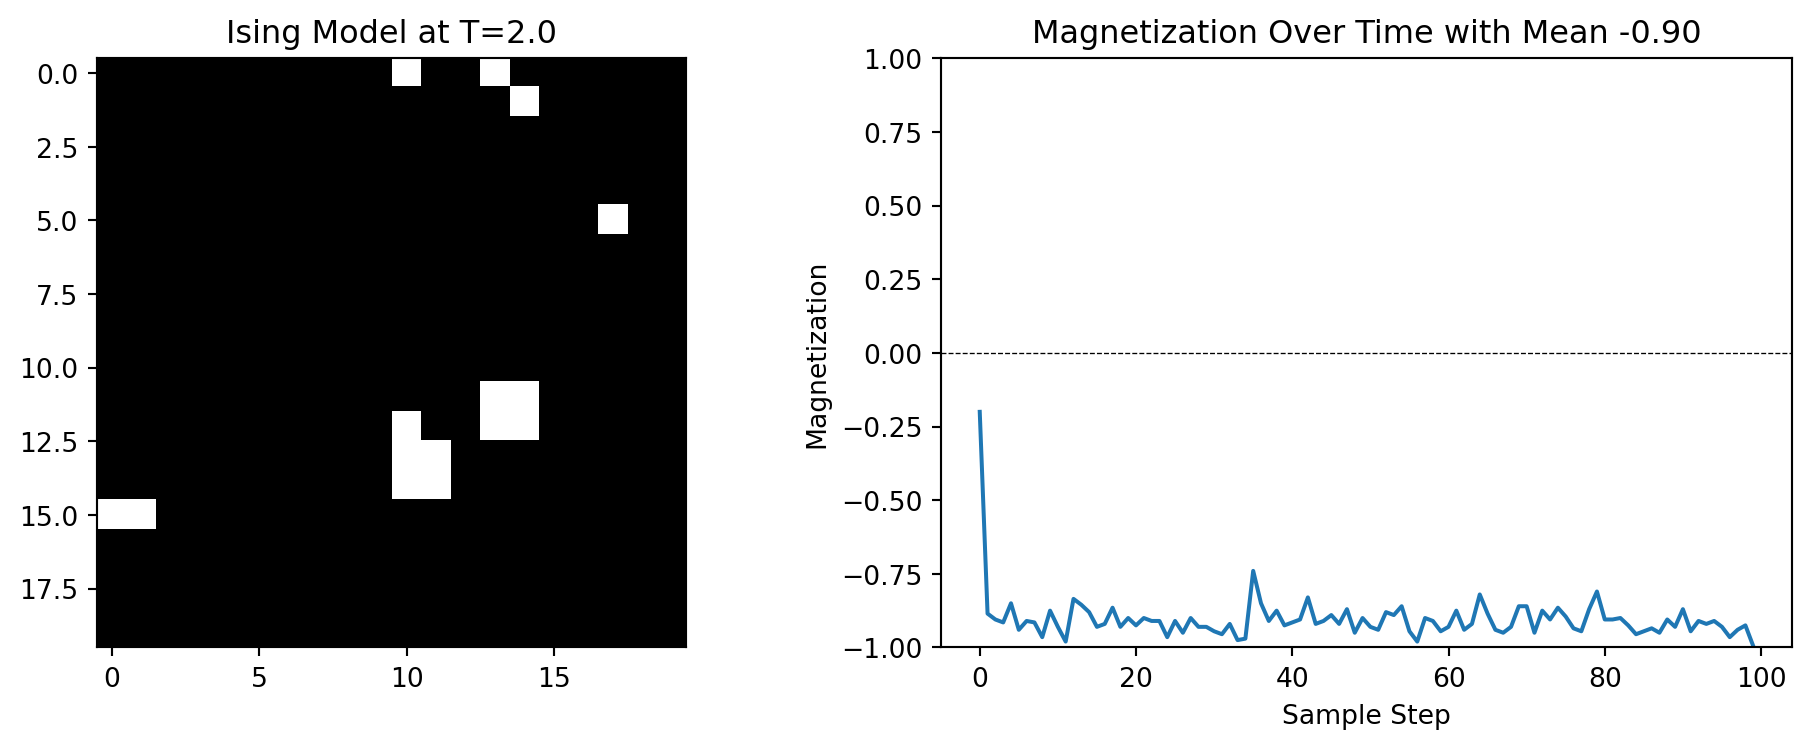

In [8]:
# Visualization
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.imshow(final_lattice, cmap='gray')
plt.title(f'Ising Model at T={T}')

plt.subplot(1, 2, 2)
plt.ylim(-1, 1)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.plot(magnetizations)
plt.xlabel('Sample Step')
plt.ylabel('Magnetization')
plt.title('Magnetization Over Time with Mean {:.2f}'.format(np.mean(magnetizations)))

plt.tight_layout()
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_lattice(L):
    """Initialize a random LxL lattice with spins +/-1."""
    return np.random.choice([-1, 1], size=(L, L))

def energy(lattice, J=1):
    """Compute the total energy of the lattice."""
    L = lattice.shape[0]
    E = 0
    for i in range(L):
        for j in range(L):
            S = lattice[i, j]
            neighbors = lattice[(i+1)%L, j] + lattice[i, (j+1)%L] + \
                        lattice[(i-1)%L, j] + lattice[i, (j-1)%L]
            E += -J * S * neighbors
    return E / 2  # Each pair counted twice

def monte_carlo_step(lattice, beta, J=1):
    """Perform a single Monte Carlo step using the Metropolis algorithm."""
    L = lattice.shape[0]
    for _ in range(L*L):
        i, j = np.random.randint(0, L, size=2)
        S = lattice[i, j]
        neighbors = lattice[(i+1)%L, j] + lattice[i, (j+1)%L] + \
                    lattice[(i-1)%L, j] + lattice[i, (j-1)%L]
        dE = 2 * J * S * neighbors
        if dE < 0 or np.random.rand() < np.exp(-beta * dE):
            lattice[i, j] *= -1

def magnetization(lattice):
    """Compute the magnetization of the lattice."""
    return np.sum(lattice) / lattice.size

def simulate_ising(L, T, steps):
    """Simulate the 2D Ising model for a given temperature and steps."""
    beta = 1 / T
    lattice = initialize_lattice(L)
    magnetizations = []
    
    for _ in range(steps):
        monte_carlo_step(lattice, beta)
        if _ % (steps // 100) == 0:  # Sample magnetization every 1% of the steps
            magnetizations.append(magnetization(lattice))
    return lattice, magnetizations

# Parameters
L = 20  # Lattice size
T = 2.5  # Temperature
steps = 5000  # Number of Monte Carlo steps

# Run simulation
final_lattice, magnetizations = simulate_ising(L, T, steps)

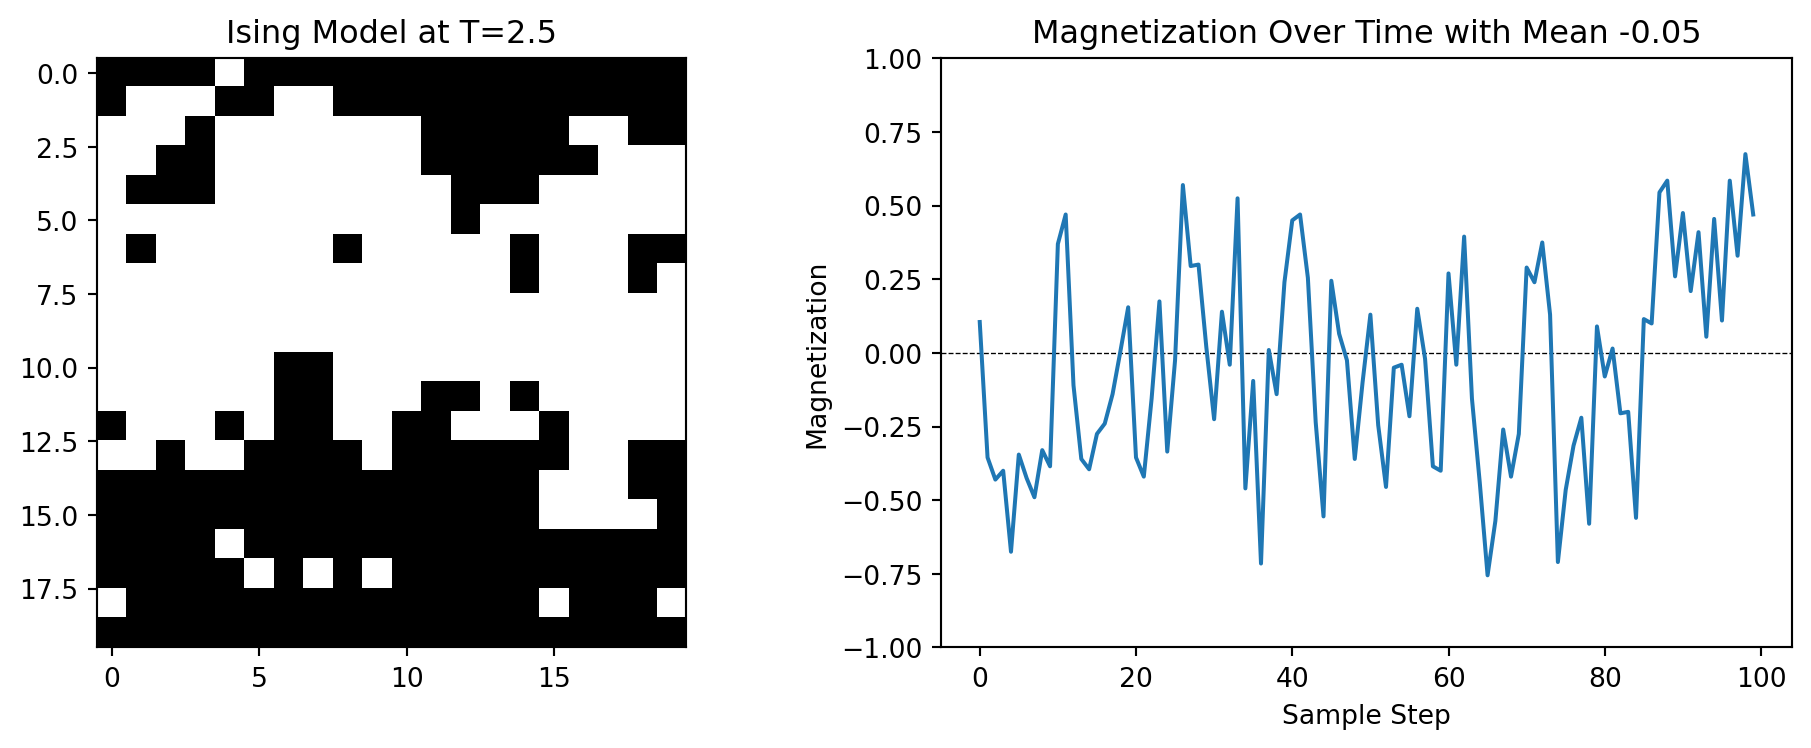

In [10]:
# Visualization
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.imshow(final_lattice, cmap='gray')
plt.title(f'Ising Model at T={T}')

plt.subplot(1, 2, 2)
plt.ylim(-1, 1)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.plot(magnetizations)
plt.xlabel('Sample Step')
plt.ylabel('Magnetization')
plt.title('Magnetization Over Time with Mean {:.2f}'.format(np.mean(magnetizations)))

plt.tight_layout()
plt.show()